# Overview
 Project 6 is an opportunity to create your own custom exploratory data analysis (EDA) project using GitHub, Git, Jupyter, pandas, Seaborn and other popular data analytics tools.

 Created By Priyanka Naskar
 
 Date 2/12/2024

# Deliverable Names
GitHub Repository: datafun-06-eda

Documentation: README.md

Notebook: naskar_eda.ipynb

# External Dependencies
upyterlab

pandas

pyarrow

matplotlib

seaborn

In [1157]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

# Exploratory Data Analysis
Perform a unique exploratory data analysis project using the tools and skills covered previously.

Here we import data set of "Penguins"Data det and do some analysis.

#  Data Acquisition

In [1158]:
import seaborn as sns
df = sns.load_dataset("penguins")
# Inspect first rows of the DataFrame
print(df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


The dataset likely includes different species of penguins, such as Adelie, Chinstrap, and Gentoo..The dataset includes measurements like bill length, bill depth, flipper length, and body mass.

# Initial Data Inspection

In [1159]:

print(df.head(10))
print(df.shape)
print(df.dtypes)
print(df.info)

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   
6  Adelie  Torgersen            38.9           17.8              181.0   
7  Adelie  Torgersen            39.2           19.6              195.0   
8  Adelie  Torgersen            34.1           18.1              193.0   
9  Adelie  Torgersen            42.0           20.2              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
5       3650.0    Male  
6       36

Identify the columns present in the DataFrame. Look for features such as species, bill length, bill depth, flipper length, body mass, and sex.

# 3. Initial Descriptive Statistics

In [1160]:
print(df.describe())

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000


This is the intial desctiption of penguins spiecs.

# Initial Data Distribution for Numerical Columns

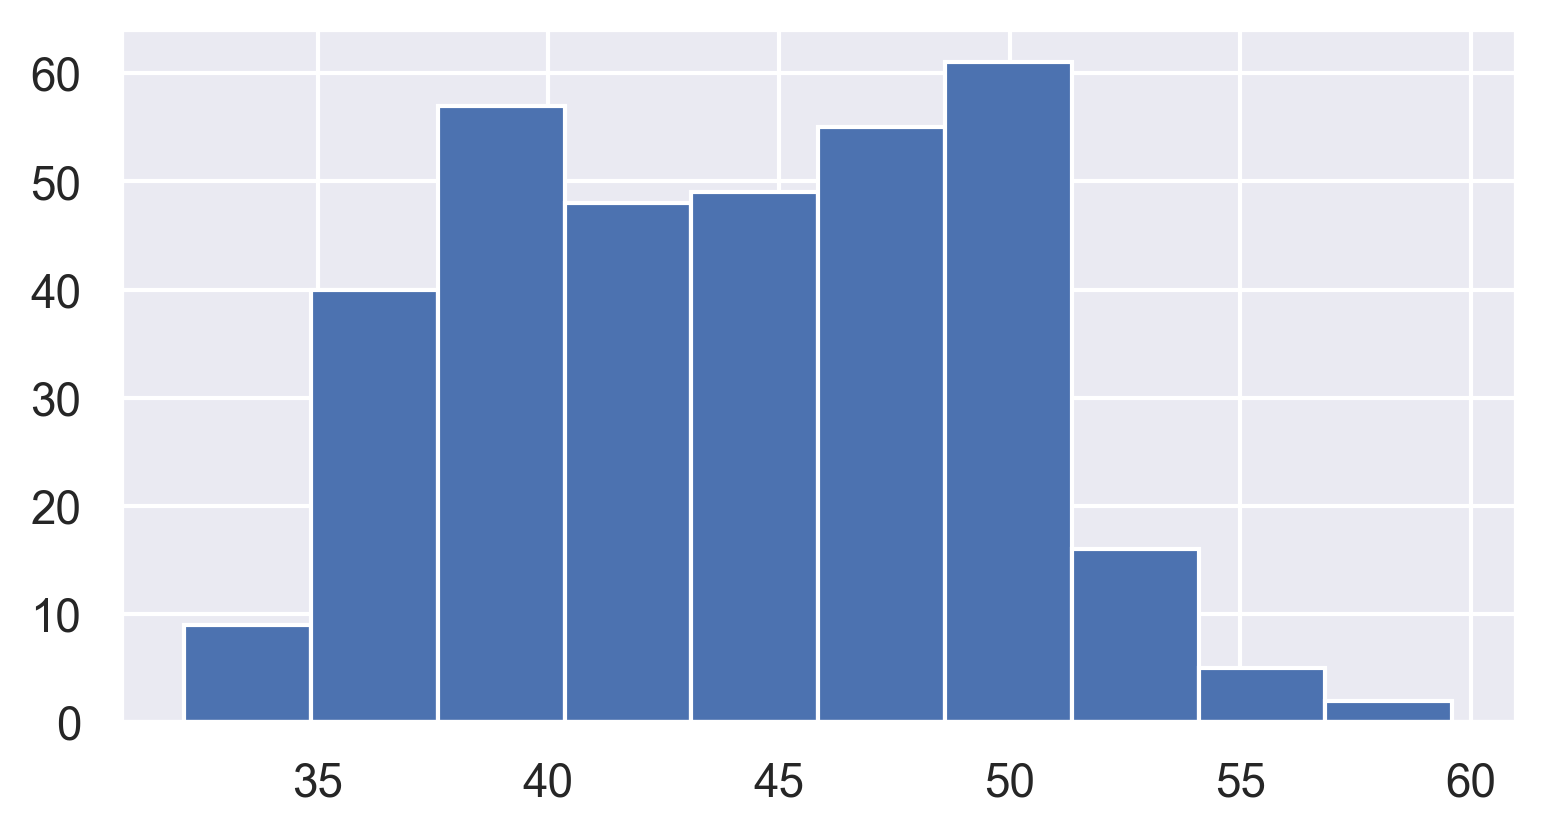

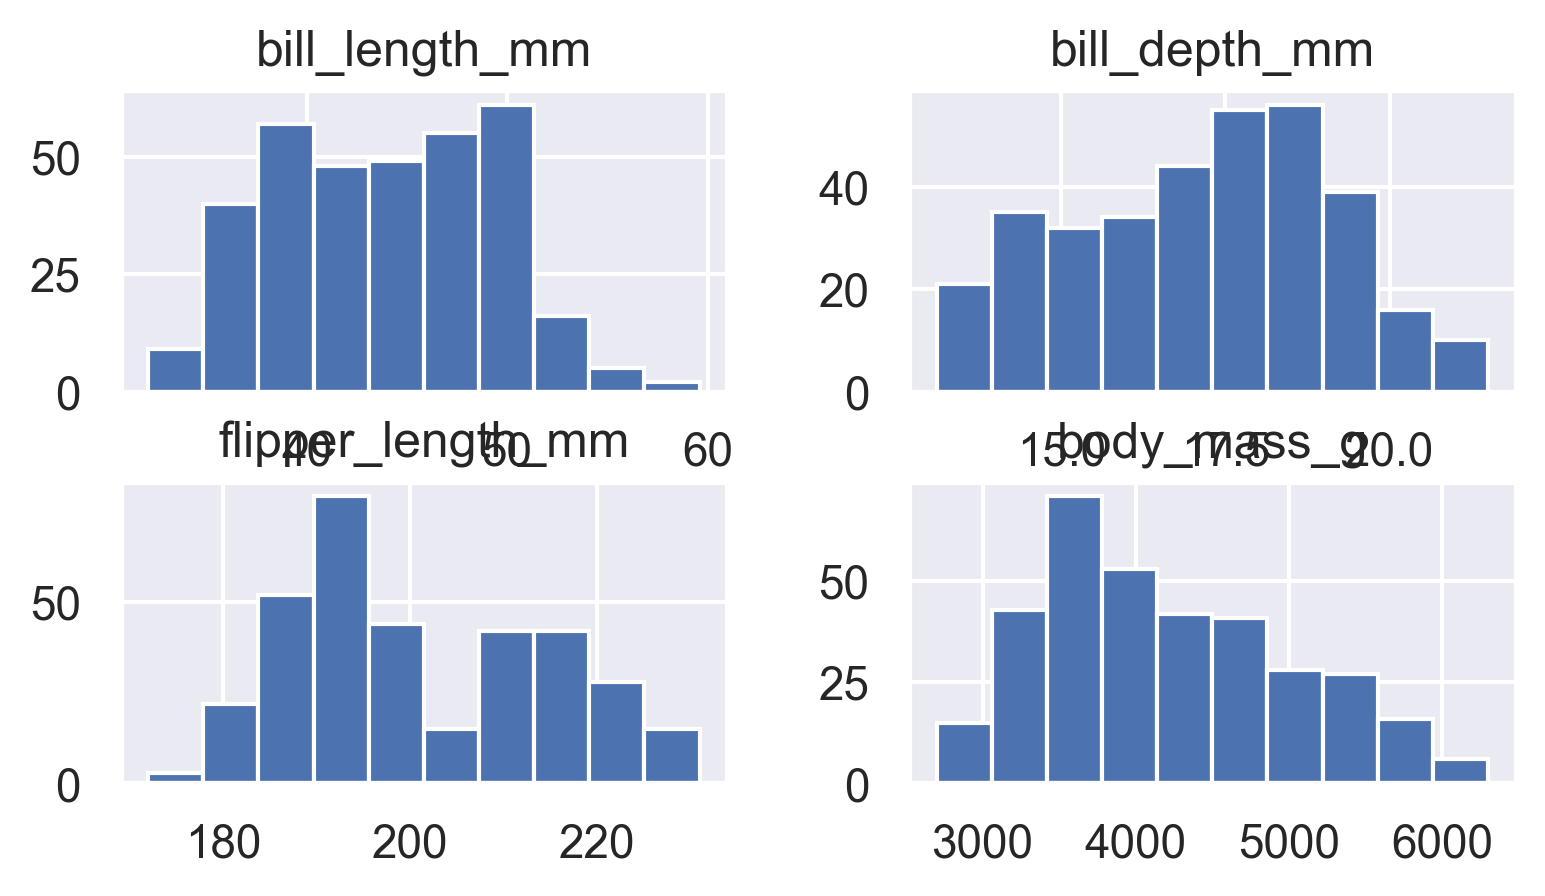

In [1161]:
# Inspect histogram by numerical column
df['bill_length_mm'].hist()

# Inspect histograms for all numerical columns
df.hist()

# Show all plots
plt.show()

By examining the histogram for 'bill_length_mm',I can observe the distribution of bill lengths across all data points.The combined histograms for all numerical columns offer a broader view of the dataset. Ican observe the distributions of various features like bill length, bill depth, flipper length, and body mass.Look for potential outliers in the histograms. Outliers can be identified as values that deviate significantly from the majority of the data.Identify if there are multiple peaks in the histograms, suggesting the presence of multiple modes in the data distributions.Identify if there are multiple peaks in the histograms, suggesting the presence of multiple modes in the data distributions.If multiple numerical columns are present, consider exploring potential correlations between them. Scatter plots or correlation matrices can complement the information provided by histograms.

# Initial Data Distribution for Categorical Columns

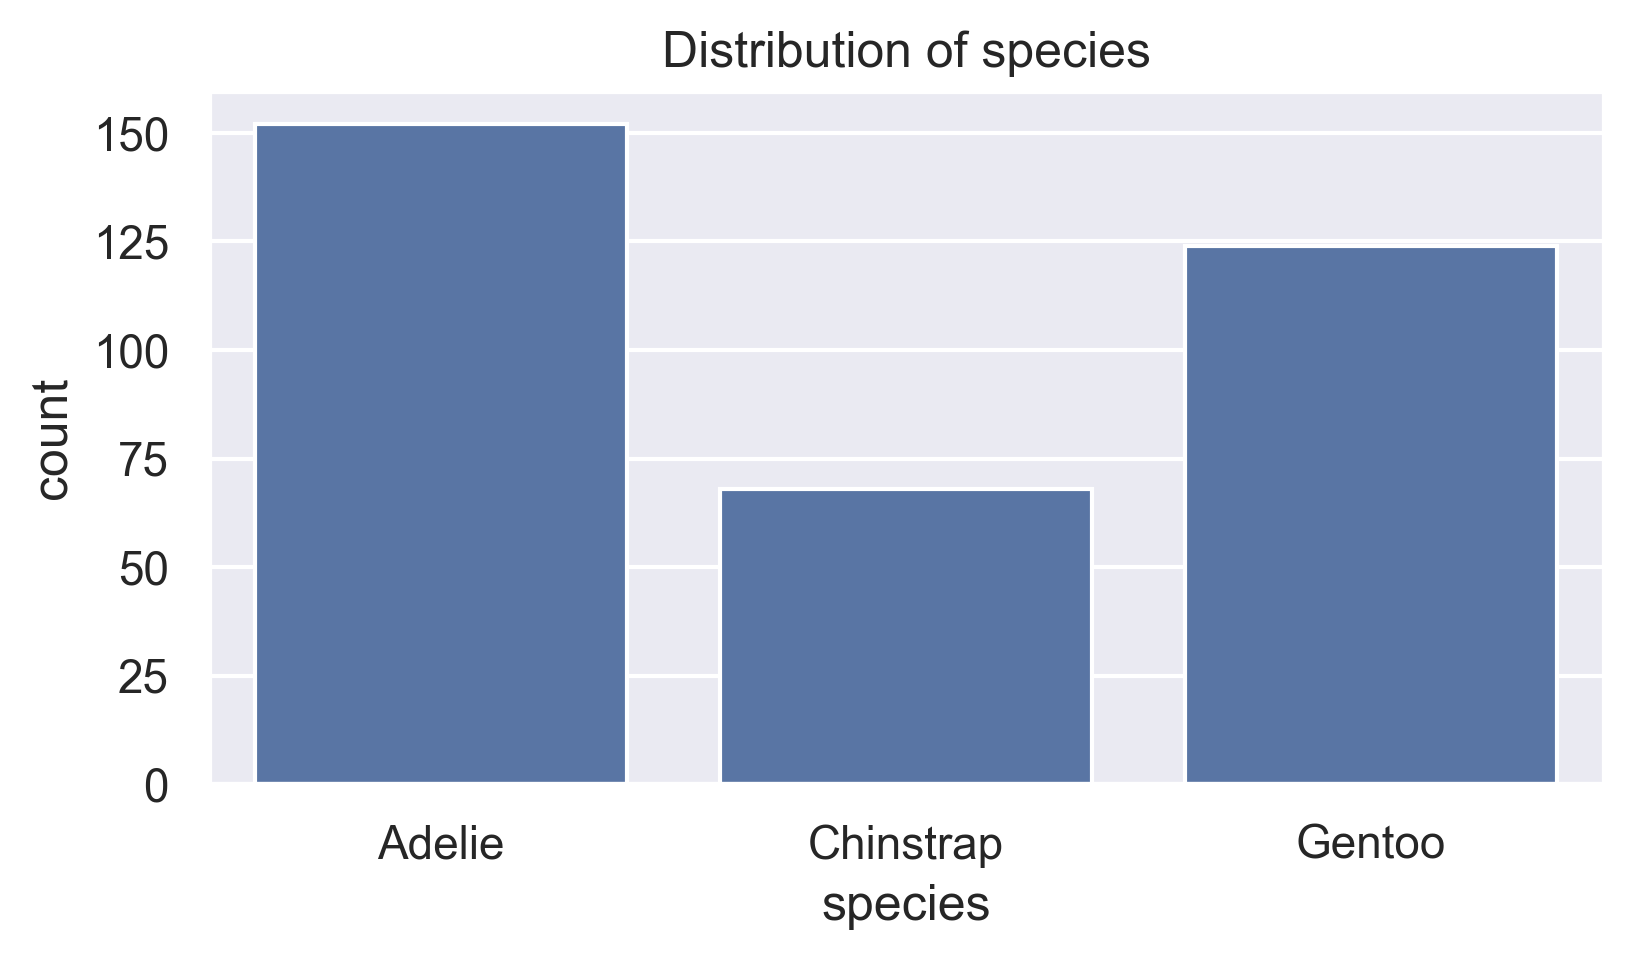

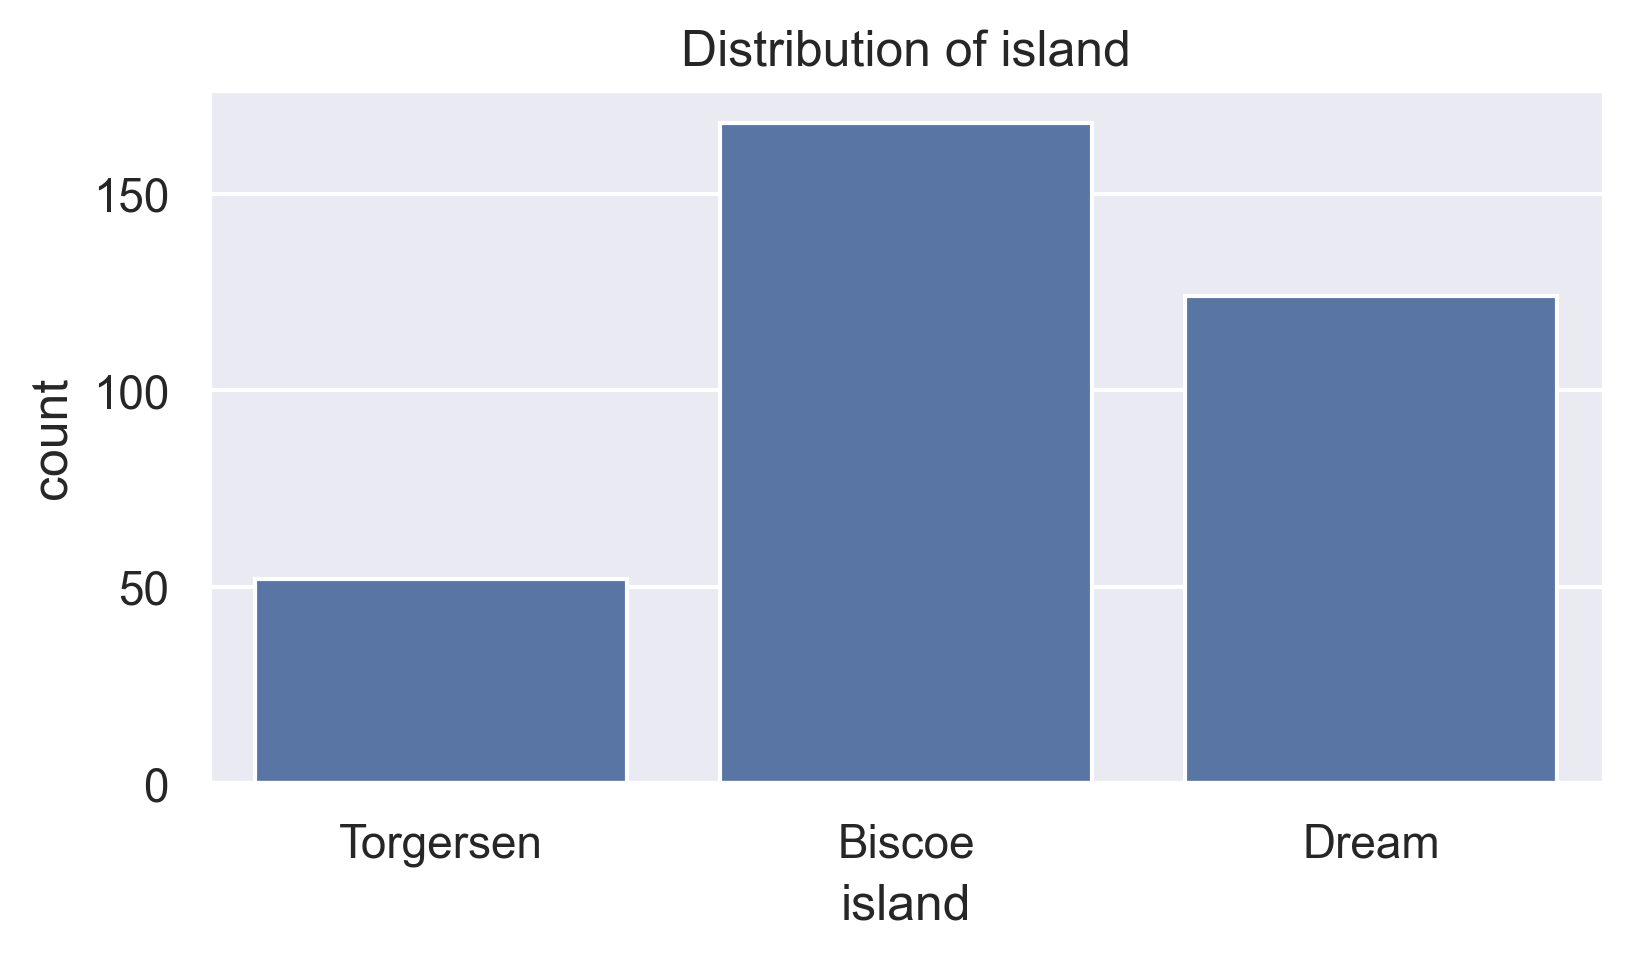

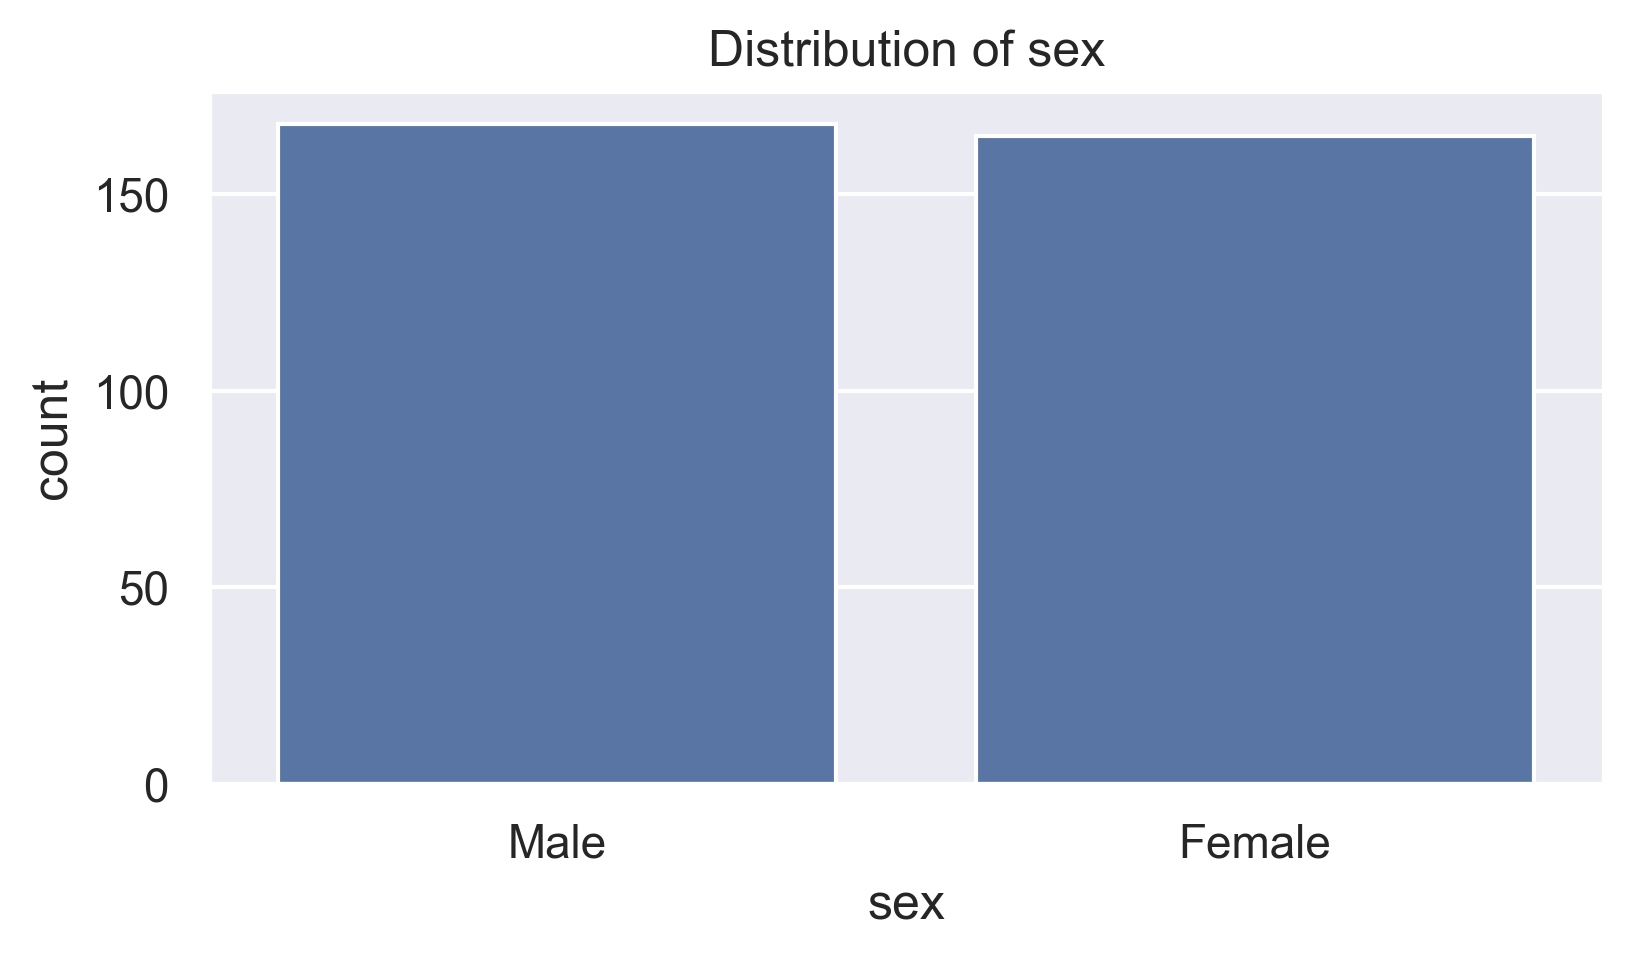

In [1162]:
# Inspect value counts by categorical column
df['species'].value_counts()

# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()

The first part of the code (df['species'].value_counts()) gives the count of each penguin species. You can observe the distribution of Adelie, Chinstrap, and Gentoo penguins.

The loop iterates over all categorical columns using sns.countplot to display count plots for each categorical variable. This provides a visual representation of the distribution of categories in columns such as 'island' or 'sex'.

Check if there is a significant imbalance in the distribution of categories. Imbalances might be important to consider, especially if you are planning to perform classification tasks.The count plots offer a quick overview of how the dataset is composed in terms of different categories. This can be helpful for understanding the diversity or representation of each category.Ensure that the categories align with expectations. Check for any unexpected or inconsistent categories that might require further investigation.

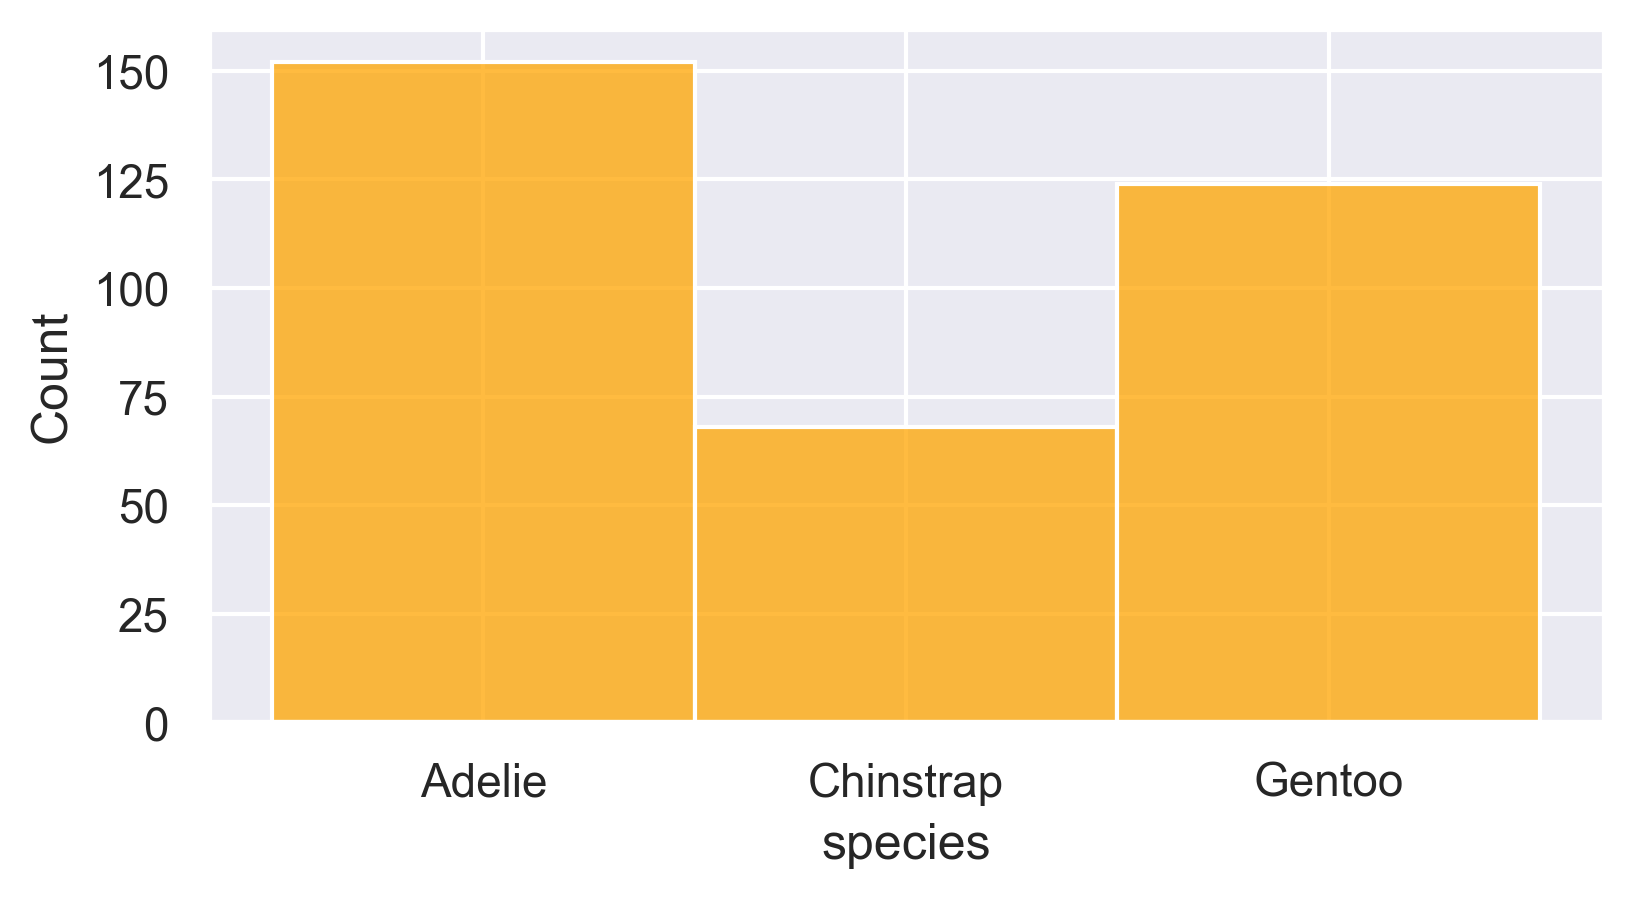

In [1163]:
sns.histplot(x = "species", data = df, color="orange")
plt.show()

We have 3 unique species values.(Adelie, Chinstrap, Gentoo)
The most common type is Adelie.(152 times)
The least common type is Chinstrap.(68 times)

# Initial Data Transformation and Feature Engineering

# Missing values

In [1164]:
df.head(20)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


Find Missing Values

In [1165]:
df.columns[df.isnull().any()]

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'sex'],
      dtype='object')

In [1166]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

There is 2 missing values in bill_length_mm column, 2 missing values bill_depth_mm column, 2 missing values in flipper_length_mm column, 2 missing values in body_mass_g column and 10 missing values in sex column.

Fill Missing Values

In [1167]:
df[df["bill_length_mm"].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [1168]:
df[df["bill_depth_mm"].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [1169]:
df[df["flipper_length_mm"].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [1170]:
df[df["body_mass_g"].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [1171]:
df[df["sex"].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


All these columns except 'sex' (bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g) missing values coming from the same datas.
'3.' and '339.' indexes has no values of any columns.
Lets handle this missing datas.

In [1172]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [1173]:
# Handling missing values - Example: drop rows with any missing values
df_cleaned = df.dropna()

In [1174]:
# Check for duplicates
print(df_cleaned.duplicated().sum())

0


In [1175]:
# Removing duplicates if any
df_cleaned = df_cleaned.drop_duplicates()

In [1176]:
# Check data types
print(df_cleaned.dtypes)

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


In [1177]:
# Convert a categorical feature from object to category
df_cleaned['species'] = df_cleaned['species'].astype('category')
df_cleaned['island'] = df_cleaned['island'].astype('category')
df_cleaned['sex'] = df_cleaned['sex'].astype('category')

In [1178]:
# Summary statistics
print(df_cleaned.describe())

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean        43.992793      17.164865         200.966967  4207.057057
std          5.468668       1.969235          14.015765   805.215802
min         32.100000      13.100000         172.000000  2700.000000
25%         39.500000      15.600000         190.000000  3550.000000
50%         44.500000      17.300000         197.000000  4050.000000
75%         48.600000      18.700000         213.000000  4775.000000
max         59.600000      21.500000         231.000000  6300.000000


# Rename column.

In [1179]:

def rename_column(df, old_column, new_column):
    df = df.rename(columns={old_column: new_column})
    return df
# Rename the 'bill_length_mm' column to 'bill_length'
df = rename_column(df, 'bill_length_mm', 'bill_length')
#Rename the 'body_mass_g'column to 'body_mass'
df = rename_column(df, 'body_mass_g', 'body_mass')
print(df.dtypes)

species               object
island                object
bill_length          float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass            float64
sex                   object
dtype: object


 Rename the 'bill_length_mm' column to 'bill_length' and the 'body_mass_g'column to 'body_mass'

# Inserting a column

In [1180]:
# Insert a new column

# Insert a new column 'new_column' with dummy values
df['colour'] = 'black and white'

# Print the DataFrame to verify the new column
print(df.head())

  species     island  bill_length  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen         39.1           18.7              181.0   
1  Adelie  Torgersen         39.5           17.4              186.0   
2  Adelie  Torgersen         40.3           18.0              195.0   
3  Adelie  Torgersen          NaN            NaN                NaN   
4  Adelie  Torgersen         36.7           19.3              193.0   

   body_mass     sex           colour  
0     3750.0    Male  black and white  
1     3800.0  Female  black and white  
2     3250.0  Female  black and white  
3        NaN     NaN  black and white  
4     3450.0  Female  black and white  


In this colum I added one column "colours" with column value "black and white".

# Step 7. Initial Visualizations

1. Correlation Between culmen_length_mm--culmen_depth_mm--flipper_length_mm--body_mass_g

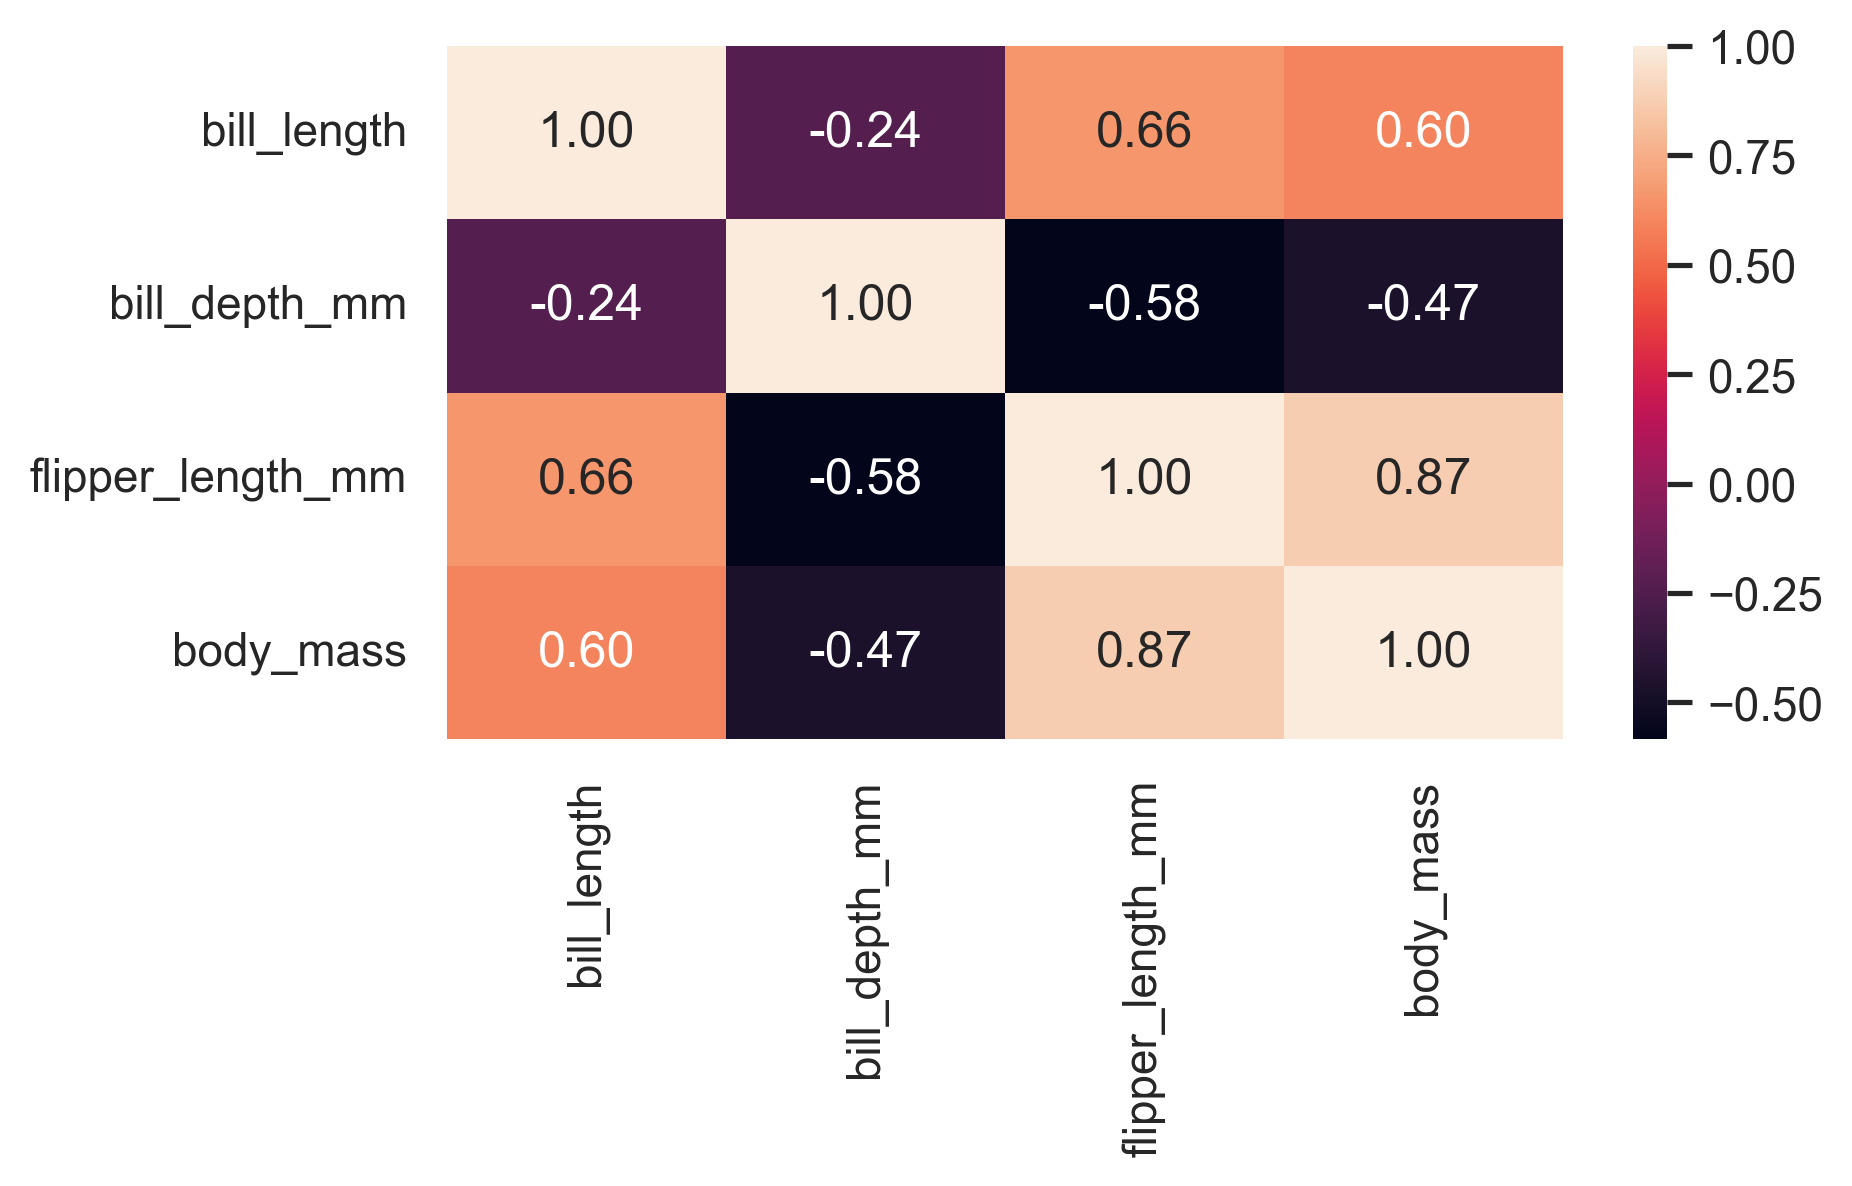

In [1181]:
list1 = ["bill_length", "bill_depth_mm", "flipper_length_mm", "body_mass"]
sns.heatmap(df[list1].corr(),annot = True, fmt = ".2f")
plt.show()

There is a big positive corelation between flipper_length_mm and body_mass_g.
Others got moderate correlation between them.


2 . species--culmen_length_mm/culmen_depth_mm

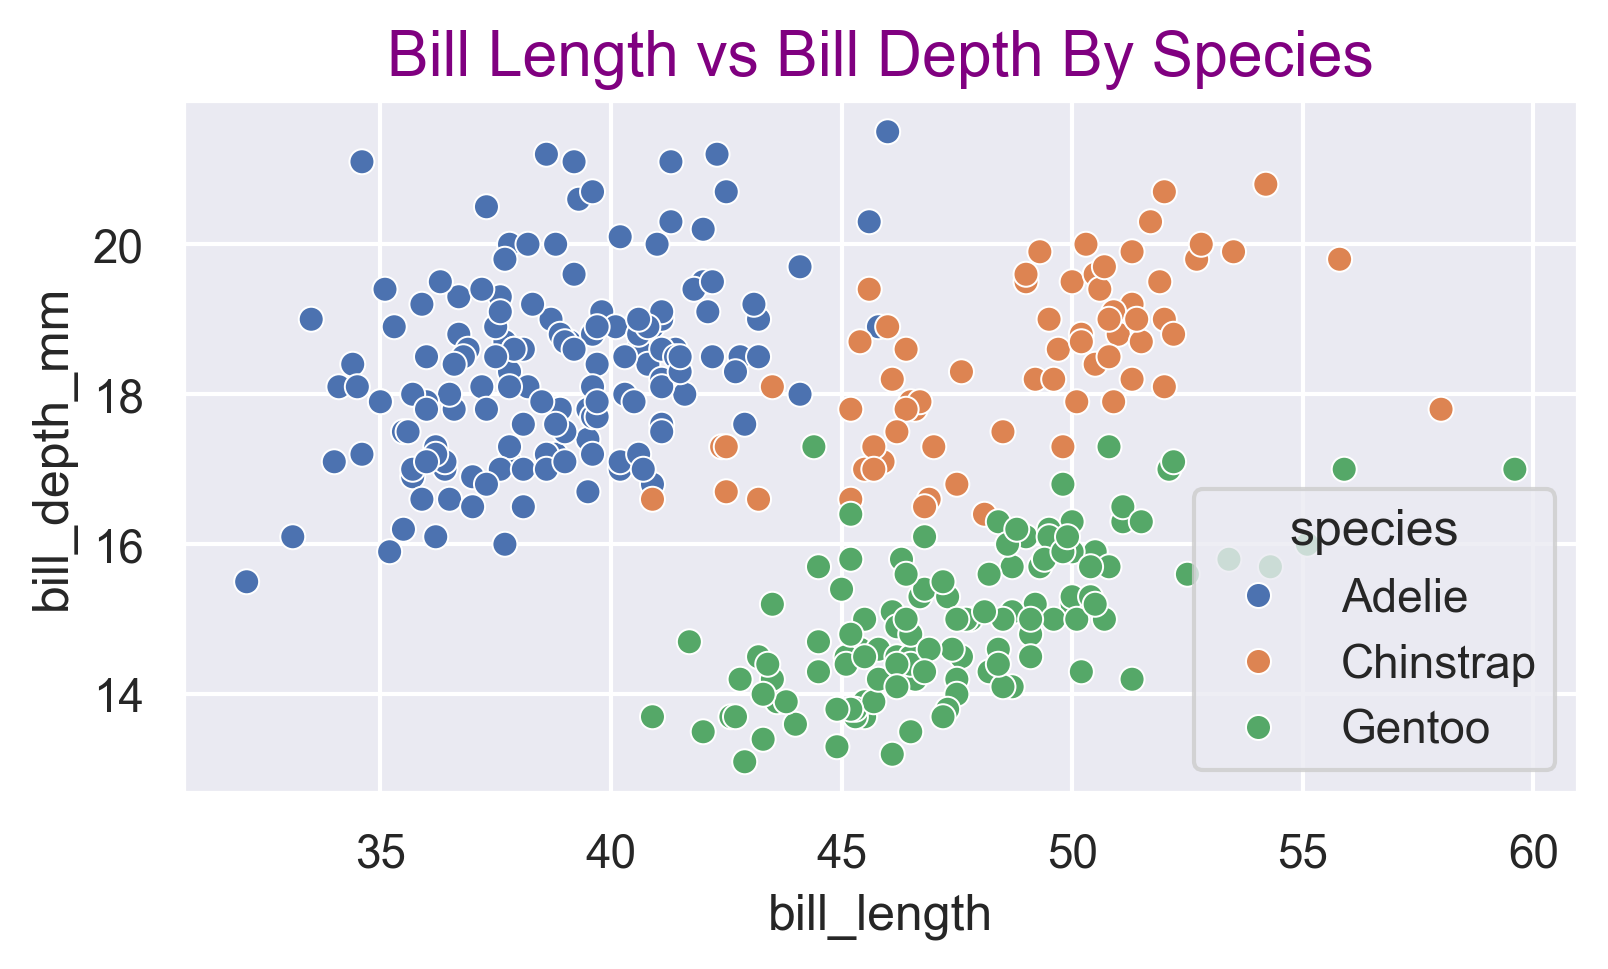

In [1182]:
sns.scatterplot(x = "bill_length", y = "bill_depth_mm", data = df, hue = "species")
plt.title("Bill Length vs Bill Depth By Species", size=15, color="purple")
plt.show()

Adelie penguins have longer culmen depth than other species but they have short culmen lenght.
Also Gentoo penguins have longer culmen lenght other species but they have short culmen depth.
Chinstrap penguins culmen depths and lenghts more balanced than other species.

3. island--culmen_length_mm/culmen_depth_mm

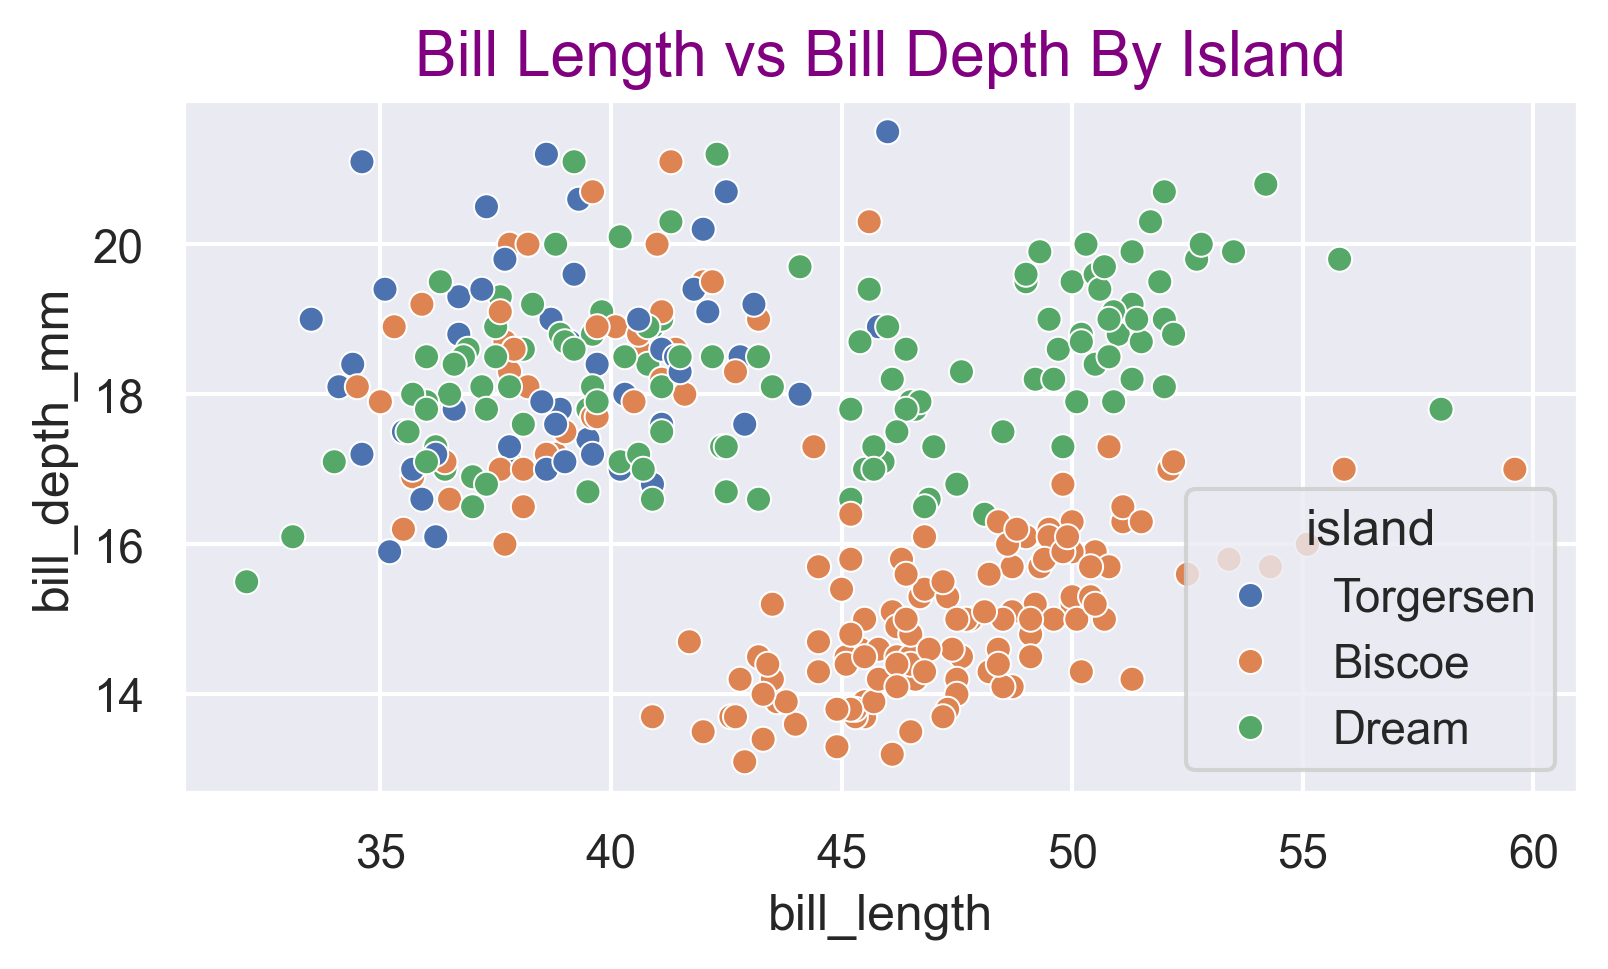

In [1183]:
sns.scatterplot(x = "bill_length", y = "bill_depth_mm", data = df, hue = "island")
plt.title("Bill Length vs Bill Depth By Island", size=15, color="purple")
plt.show()

Scatterin the graph is not certain but if culmen lenght little bit longer than others and also culmen depth is little bit shorter than others maybe we can say, it could be Biscoe island.

3.species--flipper_length_mm

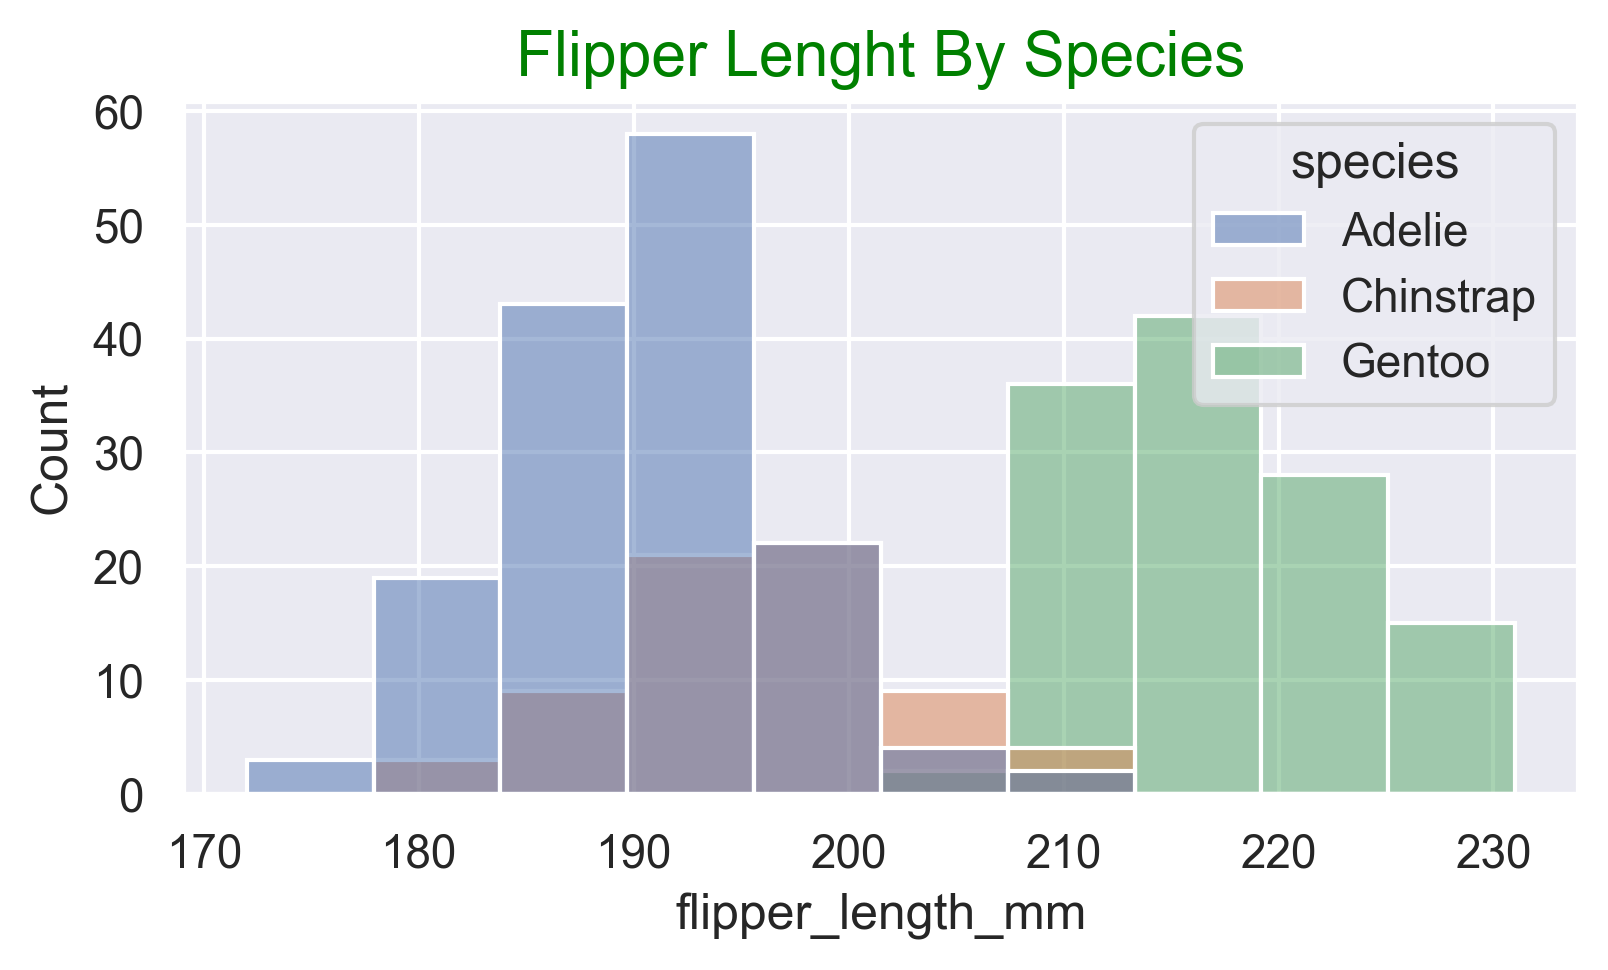

In [1184]:
sns.histplot(x = "flipper_length_mm", data = df, hue = "species")
plt.title("Flipper Lenght By Species", size=15, color="green")
plt.show()

The Gentoo species got longer flipper_length_mm.
All species common flipper_length_mm is in 190-200.
Only Gentoo species has 220 and 230 flipper_length_mm

4.island--sex--flipper_length_mm

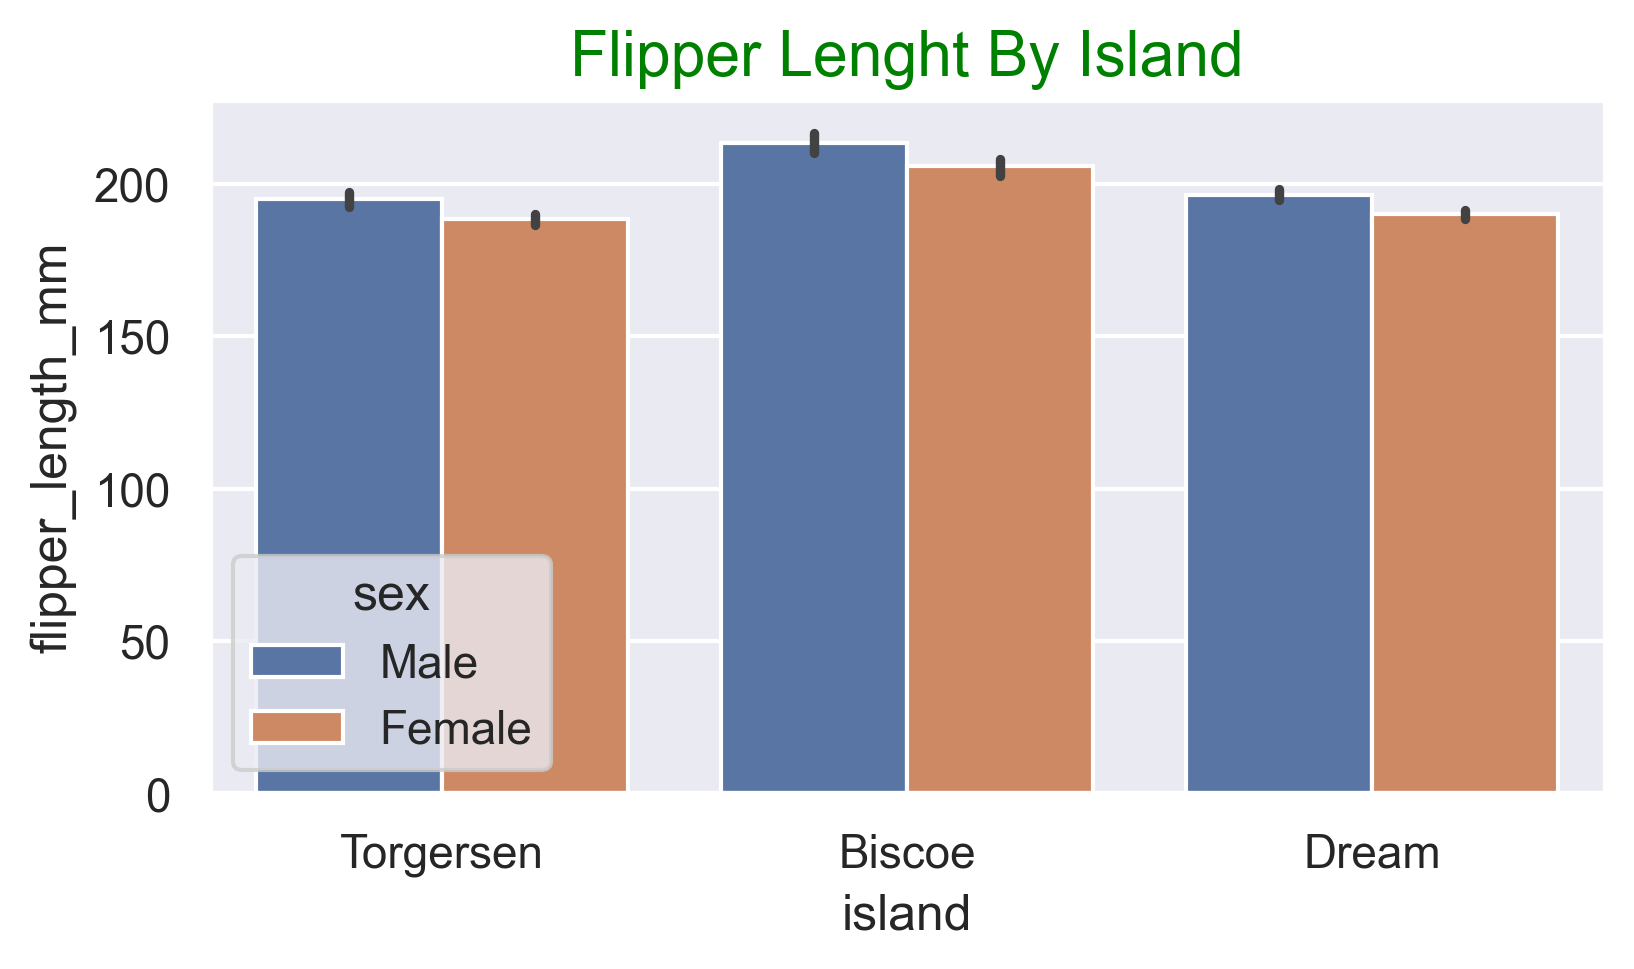

In [1185]:
sns.barplot(x = "island", y = "flipper_length_mm", data = df, hue = "sex")
plt.title("Flipper Lenght By Island", size=15, color="green")
plt.show()

Biscoe island has little bit longer flipper_length_mm than other.

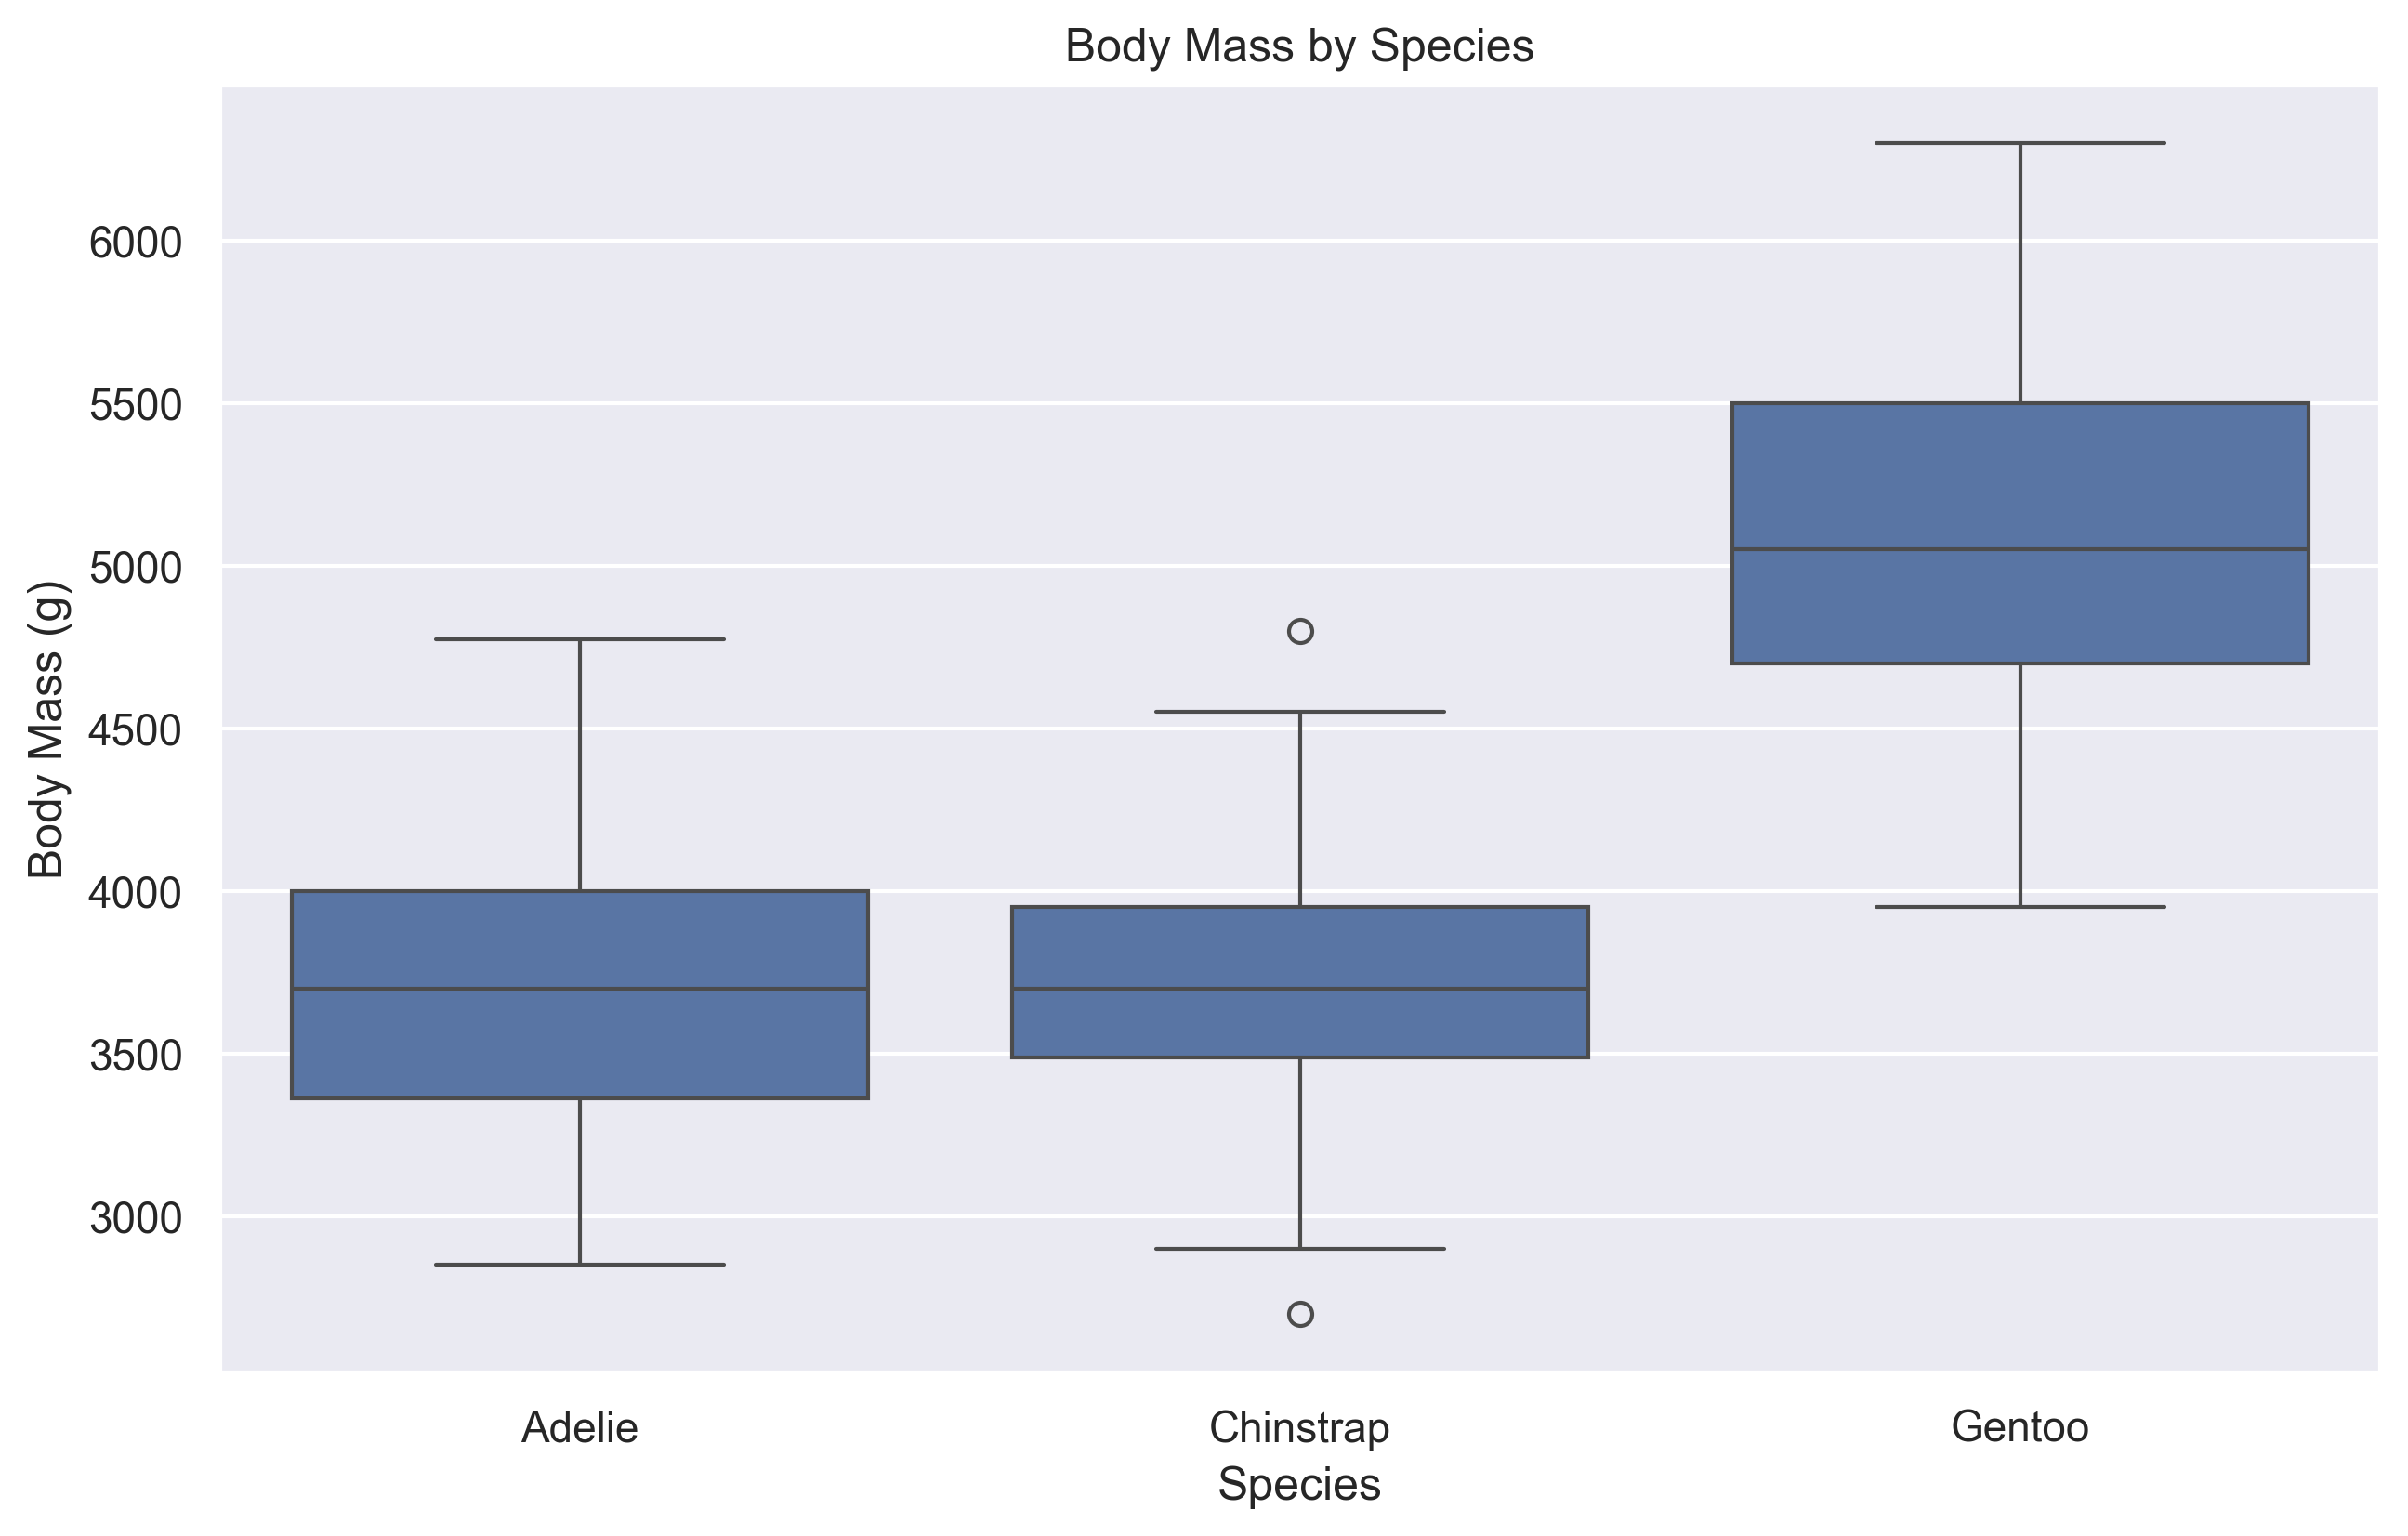

In [1186]:
# Box plot 
# body mass by species
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='species', y='body_mass_g')
plt.title('Body Mass by Species')
plt.xlabel('Species')
plt.ylabel('Body Mass (g)')
plt.show()

# Conclusion
In conclusion, the analysis of the penguins dataset revealed valuable insights into the characteristics of different penguin species. Key findings include variations in bill measurements, body mass, and species distribution. Notably, the dataset exhibited a diverse representation of Adelie, Chinstrap, and Gentoo penguins, with distinct patterns in their physical attributes. Further analysis could explore correlations between features and potentially leverage this information for predictive modeling. Despite the comprehensive exploration, it's essential to acknowledge potential limitations, such as missing values in certain columns. Overall, this analysis serves as a foundation for deeper investigations into penguin biology and behavior.
